<a href="https://colab.research.google.com/github/WittmannF/course-v4/blob/master/nbs/01_intro_colab_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Let's first download a utility file for setuping Google Colab
!wget https://raw.githubusercontent.com/WittmannF/course-v4/master/utils/colab_utils.py

--2020-03-24 17:09:00--  https://raw.githubusercontent.com/WittmannF/course-v4/master/utils/colab_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1214 (1.2K) [text/plain]
Saving to: ‘colab_utils.py’

colab_utils.py      100%[===================>]   1.19K  --.-KB/s    in 0s      

2020-03-24 17:09:00 (226 MB/s) - ‘colab_utils.py’ saved [1214/1214]



In [2]:
from colab_utils import setup_fastai_colab
setup_fastai_colab()

    NOTE: For debugging and visualizing stdout, please run:
    from colab_utils import *
    !{REQUIREMENTS_PIP}
    !{GIT_CLONE_REPOSITORY}
    %cd {FASTAI_NB_PATH}

Installing requirements...
Done!
Cloning FastAI Repository...
Done!
Opening folder course-v4/nbs/ with nbs and utils files...
Done!


In [0]:
# COLAB USERS: For running the rest go to Runtime > Run After
#hide
from utils import *

# Your deep learning journey

## Deep learning is for everyone

## Neural networks: a brief history

## What you will learn

## Who we are

## How to learn deep learning

### Your projects and your mindset

## The software: PyTorch, fastai, and Jupyter (and why it doesn't matter)

## Your first model

### Getting a GPU deep learning server

### Running your first notebook

In [4]:
# CLICK ME
from fastai2.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.181451,0.032528,0.011502,00:45


epoch,train_loss,valid_loss,error_rate,time
0,0.043168,0.013186,0.004060,00:47


### Sidebar: This book was written in Jupyter Notebooks

In [5]:
1+1

2

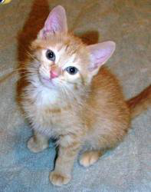

In [6]:
img = PILImage.create('images/chapter1_cat_example.jpg')
img.to_thumb(192)

### End sidebar

In [8]:
# FOR COLAB USERS ONLY: widgets.FileUpload() was not working, 
# we will use the upload env from Google Colab
#uploader = widgets.FileUpload()
#uploader

from google.colab import files
uploader = files.upload()

Saving 56440159_2128703410550206_4929913373887299584_n.jpg to 56440159_2128703410550206_4929913373887299584_n.jpg


In [10]:
# COLAB USERS: This cell has been added for testing the image that has been uploaded earlier
img = PILImage.create(next(iter(uploader.keys())))
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


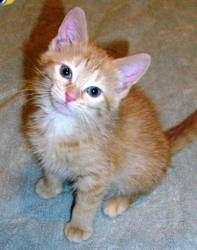

In [24]:
img

In [0]:
#hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [12]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.999998


### What is machine learning?

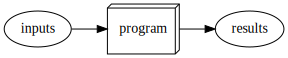

In [13]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

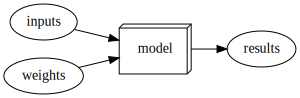

In [14]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

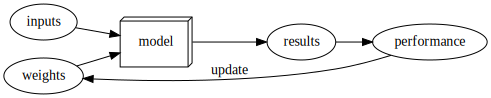

In [15]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

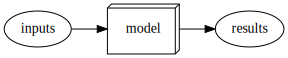

In [16]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

### What is a neural network?

#### A bit of deep learning jargon

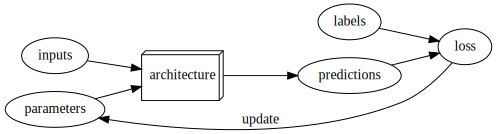

In [17]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

### Limitations inherent to machine learning

From this picture we can now see some fundamental things about training a deep learning model:

- A model cannot be created without data ;
- A model can only learn to operate on the patterns seen in the input data used to train it ;
- This learning approach only creates *predictions*, not recommended *actions* ;
- It's not enough to just have examples of input data; we need *labels* for that data too (e.g. pictures of dogs and cats aren't enough to train a model; we need a label for each one, saying which ones are dogs, and which are cats).

Generally speaking, we've seen that most organizations that think they don't have enough data, actually mean they don't have enough *labeled* data. If any organization is interested in doing something in practice with a model, then presumably they have some inputs they plan to run their model against. And presumably they've been doing that some other way for a while (e.g. manually, or with some heuristic program), so they have data from those processes! For instance, a radiology practice will almost certainly have an archive of medical scans (since they need to be able to check how their patients are progressing over time), but those scans may not have structured labels containing a list of diagnoses or interventions (since radiologists generally create free text natural language reports, not structured data). We'll be discussing labeling approaches a lot in this book, since it's such an important issue in practice.

Since these kinds of machine learning models can only make *predictions* (i.e. attempt to replicate labels), this can result in a significant gap between organizational goals and model capabilities. For instance, in this book you'll learn how to create a *recommendation system* that can predict what products a user might purchase. This is often used in e-commerce, such as to customize products shown on a home page, by showing the highest-ranked items. But such a model is generally created by looking at a user and their buying history (*inputs*) and what they went on to buy or look at (*labels*), which means that the model is likely to tell you about products they already have, or already know about, rather than new products that they are most likely to be interested in hearing about. That's very different to what, say, an expert at your local bookseller might do, where they ask questions to figure out your taste, and then tell you about authors or series that you've never heard of before.

### How our image recognizer works

### What our image recognizer learned

### Image recognizers can tackle non-image tasks

### Jargon recap

## Deep learning is not just for image classification

In [18]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.847728,2.942345,00:01


epoch,train_loss,valid_loss,time
0,1.981840,1.591103,00:01
1,1.651440,1.318831,00:01
2,1.466388,1.106814,00:01
3,1.305955,1.011550,00:01
4,1.181592,0.861153,00:01
5,1.074996,0.818451,00:01
6,0.985987,0.822573,00:01
7,0.916174,0.816234,00:01


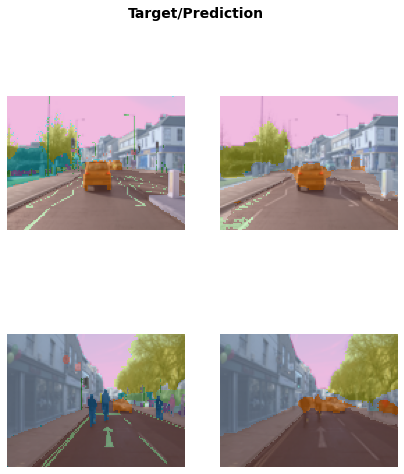

In [19]:
learn.show_results(max_n=6, figsize=(7,8))

In [0]:
# COLAB USERS: I had to add this cell because of 'CUDA out of memory' error
torch.cuda.empty_cache()

In [21]:
from fastai2.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.594366,0.386861,0.828200,02:13


epoch,train_loss,valid_loss,accuracy,time
0,0.309080,0.240512,0.903160,04:14
1,0.228632,0.208476,0.917160,04:08
2,0.159254,0.206078,0.922120,04:10
3,0.141157,0.195517,0.926320,04:13


In [22]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.0052, 0.9948]))

### Sidebar: The order matter

### End sidebar

In [40]:
from fastai2.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

TypeError: ignored

In [0]:
learn.fit_one_cycle(3)

In [0]:
from fastai2.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

In [0]:
learn.show_results()

### Sidebar: Datasets: food for models

### End sidebar

## Validation sets and test sets

### Use judgment in defining test sets

## A _Choose Your Own Adventure_ moment

## Questionnaire

### Further research